In [833]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt
import warnings

warnings.filterwarnings('ignore') # to ignore the warnings

In [834]:
# Loading the loan data and converting into dataframe

loan_df=pd.read_csv('loan.csv')



##  Data Cleaning

### Verify if there are any headers, footers, or summary rows, and remove them if found.


In [837]:
loan_df.head()
print(loan_df.shape)
loan_df.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [838]:
# The above DataFrame does not include any headers or summary rows => Examine if there are any footer rows present.
loan_df.tail()
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [839]:
# Based on the previous analysis, it appears that there are no footer, Total, or Subtotal rows in the DataFrame. 
# Let's inspect the shape of the loan DataFrame to confirm.

In [840]:
#To check if there is unnessasry rows or not.
loan_df['loan_status'].value_counts()


loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [841]:
# Removing rows where loan_status is 'Current' because these loans are still ongoing and do not provide conclusive information about whether the customer will default or pay in the future.
loan_df= loan_df[loan_df['loan_status']!='Current']
print("Number of rows now:",len(loan_df))

Number of rows now: 38577


In [842]:
# Check any duplicate rows.
duplicate_rows = len(loan_df[loan_df.duplicated()])
print("Count of duplicate rows:",round(duplicate_rows,2))


Count of duplicate rows: 0


### Delete the Uneccessasry Columns.

In [844]:
loan_df.shape

(38577, 111)

In [845]:
# To Check the details of columns if the they are nulls or blanks as value.
(loan_df.isnull().sum()*100)/len(loan_df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [846]:
# We can see there are many columns which is having all the value as null/blanks and not doesn participate in analysis.
# Hence removing them

In [847]:
# Deleting the columns which is having all rows values as na.
loan_df = loan_df.dropna(axis=1, how="all")
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [848]:
# Removing rows where all column values are NA
loan_df = loan_df.dropna(axis=0, how="all")
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [849]:
# Identify and remove columns where each value is distinct.

unique_columns = [col for col in loan_df.columns if loan_df[col].nunique() == len(loan_df)]
unique_columns


['id', 'member_id', 'url']

In [850]:
#  Delete'member_id', and 'url' as it doesn't count in EDA. Will keep the id columns for future use.
loan_df.drop(['url','member_id'],axis=1, inplace=True)


In [851]:
loan_df.shape

(38577, 54)

In [852]:
# Delete the column which is having text/description values as they don't donctribute to EDA.
loan_df.drop(columns=['desc','title'],inplace=True)
loan_df.shape

(38577, 52)

In [853]:
# Limit our analysis till Group level only => deleting the subgroups.
loan_df = loan_df.drop(['sub_grade'],  axis=1)

In [854]:
#Behavioural data is captured post loan approval and will not be available during the loan approval process => removing these fields.
behavioural_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

loan_df=loan_df.drop(behavioural_cols,axis=1)

In [855]:
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [856]:
# Example most of the columns values is 1.Deletting them as well.
for column in loan_df.columns:
    if loan_df[column].nunique(dropna=True) == 1:
        print(column)
        loan_df = loan_df.drop(column, axis=1)
loan_df

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,...,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,NaN,NaN,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,...,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,NaN,NaN,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,...,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,NaN,NaN,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,...,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,35.0,NaN,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,...,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,...,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,0.0,0.0,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,...,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,5.0,0.0,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,0.0,0.0,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,0.0,0.0,NaN


In [857]:
#Dropping the columns which is having more than 50% of value is null.
total_rows = len(loan_df)
for column in loan_df.columns:
    if loan_df[column].isna().mean().round(2) >= 0.50:
        print(column)
        loan_df = loan_df.drop(column, axis=1)
loan_df.shape

mths_since_last_delinq
mths_since_last_record


(38577, 20)

In [858]:
#Deleting emp_title as its description or textual informations and doesn't participate in EDA analysis.
loan_df=loan_df.drop(['emp_title'], axis=1)


##  Checking missing values


In [860]:
(loan_df.isna().sum()/len(loan_df.index))*100

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

##  Data Conversion 

In [862]:
loan_df.dtypes


id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [863]:
loan_df['term'].value_counts()

term
36 months    29096
60 months     9481
Name: count, dtype: int64

In [864]:
# Convert string to int.
def clean_term(term):
    return int(term.strip().split()[0])

loan_df['term'] = loan_df['term'].apply(clean_term)
loan_df['term'].dtype

dtype('int64')

In [865]:
loan_df['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [866]:

loan_df['int_rate'].value_counts()


int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [867]:
# Convert int_rate fromns tring to float.
loan_df['int_rate']=loan_df['int_rate'].str.strip('%').astype(float)


In [868]:
loan_df['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [869]:
# Convert the column loan_funded_amnt and funded_amnt as float64
loan_df = loan_df.astype({'loan_amnt':'float','funded_amnt':'float'})
loan_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [870]:
loan_df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [871]:
loan_df['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [872]:
# Rounding off the belows to two decimals points.
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_df[c] = loan_df[c].apply(lambda x: round(x,2))
    print(loan_df[c])


0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
    

In [873]:
#converting issue_d`to date type
loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [874]:
(loan_df.isnull().sum()*100)/len(loan_df)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

## 3. Dropping/ Imputing the rows.


In [876]:
# Dropping the null rows for emp_length and pub_rec_bankruptcies columns as number of null rows are very less.
prev_rows=len(loan_df)
prev_rows

38577

In [877]:
loan_df= loan_df[loan_df['emp_length'].notna()]
loan_df= loan_df[loan_df['pub_rec_bankruptcies'].notna()]

In [878]:
after_rows=len(loan_df)
total_deleted=((prev_rows-after_rows)*100)/prev_rows
print("Total % of rows deleted:",round(total_deleted,2))
print(loan_df.shape)

Total % of rows deleted: 4.48
(36847, 19)


In [879]:
(loan_df.isnull().sum()*100)/len(loan_df)

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [880]:
def strip_emp_length(x):
  x=x.strip("years")
  x=x.strip("<")
  x=x.replace(" ", "")
  x=x.replace("+", "")
  return x

loan_df['emp_length']=loan_df['emp_length'].apply(lambda x : strip_emp_length(x) )

In [881]:
print(loan_df['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object


## 4. Derived Columns

In [883]:
# Creating a dervied columns for issue month and issue year from issues date
loan_df['issue_year']=pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_month']=pd.DatetimeIndex(loan_df['issue_d']).month

In [884]:
print(loan_df["loan_amnt"].describe())

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [885]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annual Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

In [886]:
#Bucketing different varaibles for better analysis

In [887]:
# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan_df['loan_amnt_b'] = loan_df.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [888]:
#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_df['annual_inc_b'] = loan_df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [889]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['int_rate_b'] = loan_df.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [890]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['dti_b'] = loan_df.apply(lambda x : bucket_dti(x.dti), axis = 1)

In [891]:
# Univarients function
def plot_digram(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

<Axes: ylabel='loan_amnt'>

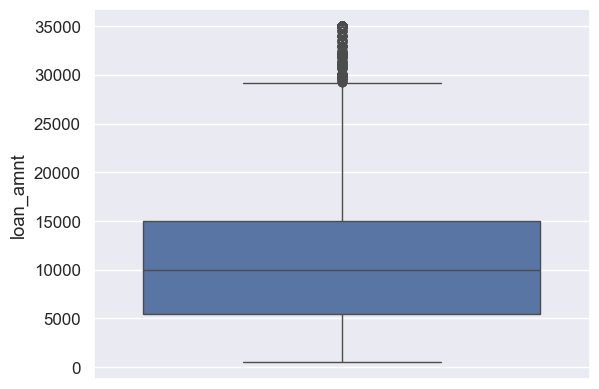

In [892]:
sea.boxplot(loan_df.loan_amnt)


count    36847.000000
mean     10872.924526
std       7109.330771
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

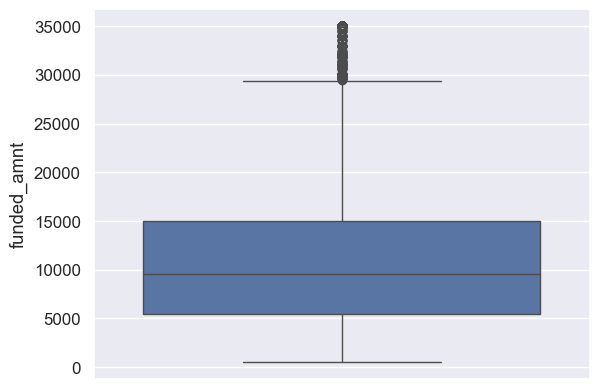

In [893]:
sea.boxplot(loan_df.funded_amnt)
loan_df['funded_amnt'].describe()

<Axes: ylabel='funded_amnt_inv'>

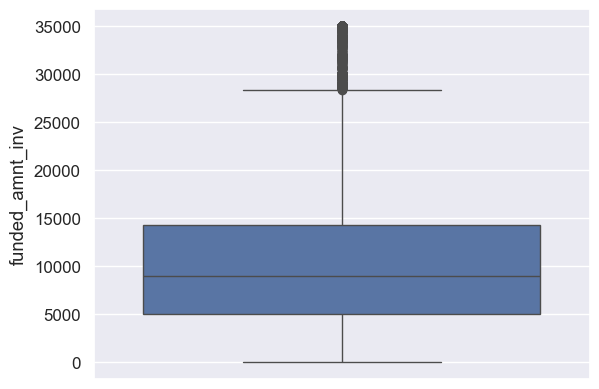

In [894]:
sea.boxplot(loan_df.funded_amnt_inv)

<Axes: ylabel='annual_inc'>

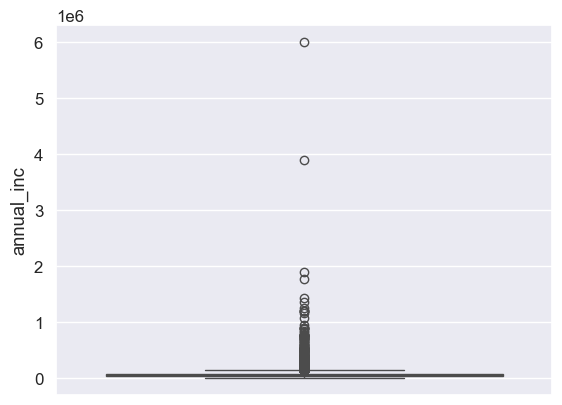

In [895]:
sea.boxplot(loan_df.annual_inc)

<Axes: ylabel='int_rate'>

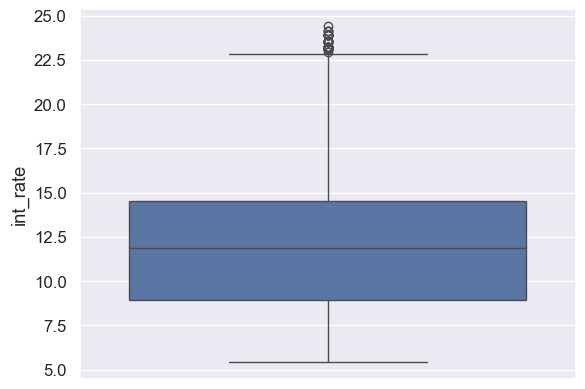

In [896]:
sea.boxplot(loan_df.int_rate)

<Axes: ylabel='installment'>

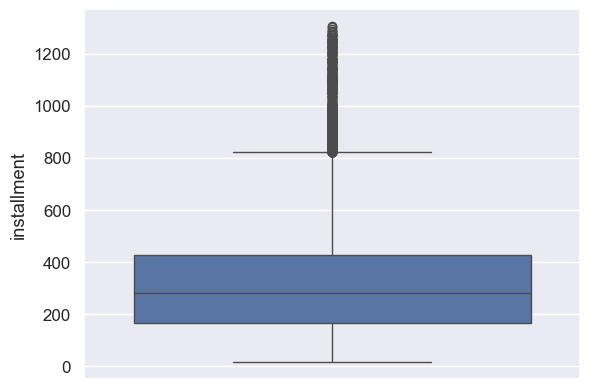

In [897]:
sea.boxplot(loan_df.installment)

In [898]:
# From above box plts we can see there is outliers exits for columns'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'.
# Lets remove the outlier
outliers_columns_set1= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set1,1.5)
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set2,1.5)



## Univariate Analysis

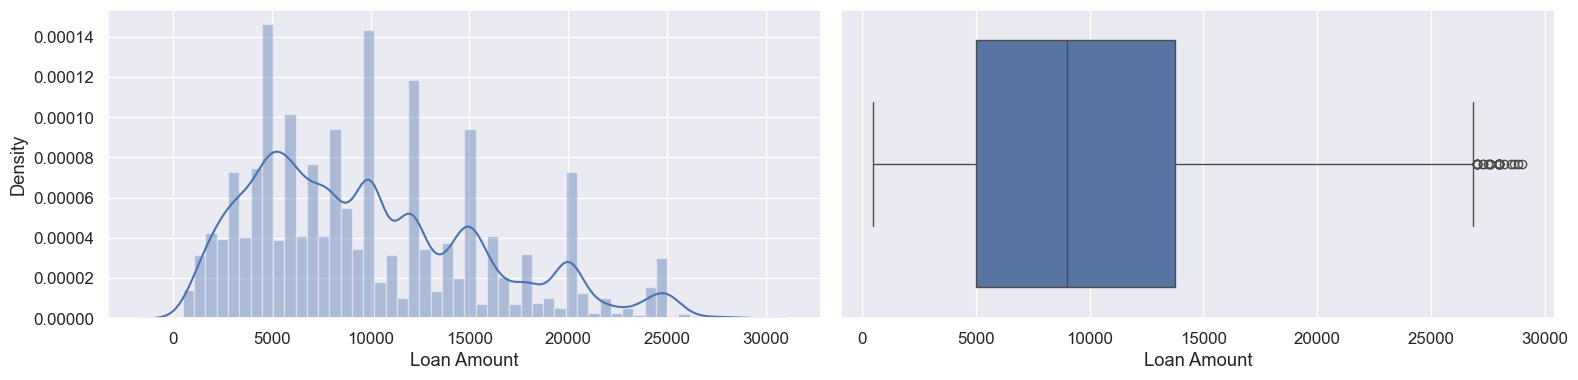

count    33191.000000
mean      9820.838480
std       5809.600807
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [900]:
plot_digram(loan_df, 'loan_amnt')
loan_df['loan_amnt'].describe()

In [901]:
# observation:
# Most of the loan amount applied was in the range of 5k-14k.
# Max Loan amount applied was ~27k.

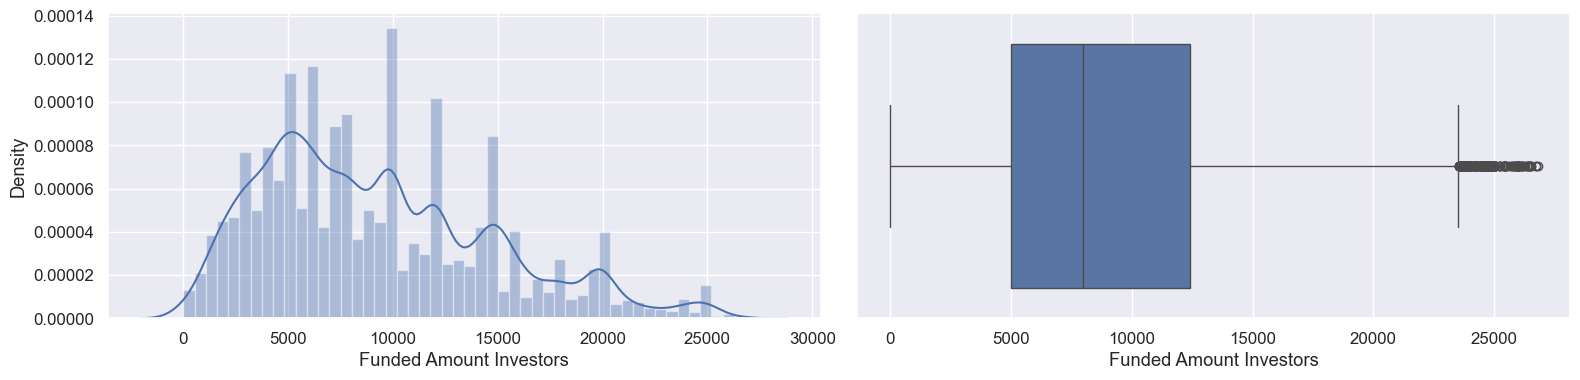

count    33191.000000
mean      9210.186390
std       5511.942478
min          0.000000
25%       5000.000000
50%       8000.000000
75%      12409.045000
max      26800.000000
Name: funded_amnt_inv, dtype: float64

In [902]:
plot_digram(loan_df, 'funded_amnt_inv')
loan_df['funded_amnt_inv'].describe()

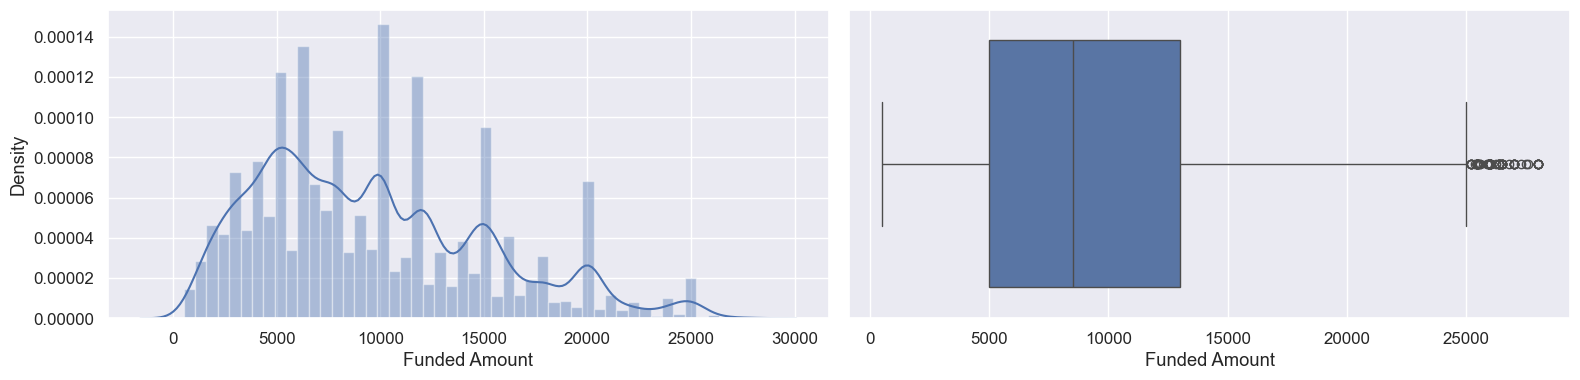

count    33191.000000
mean      9593.825887
std       5565.574327
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [903]:
plot_digram(loan_df, 'funded_amnt')
loan_df['funded_amnt'].describe()

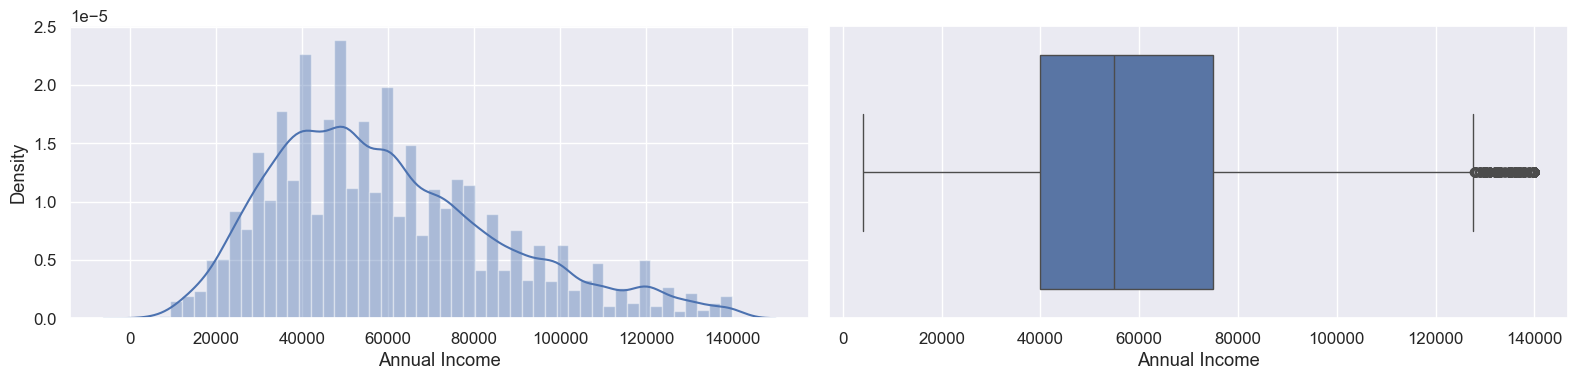

count     33191.000000
mean      59883.284700
std       26916.857415
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [904]:
plot_digram(loan_df, 'annual_inc')
loan_df['annual_inc'].describe()

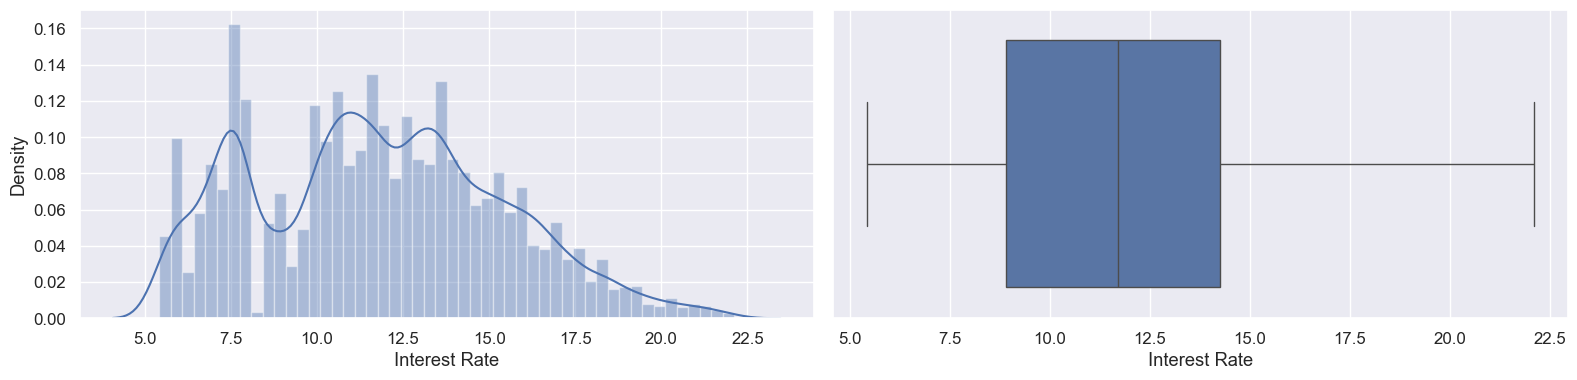

count    33191.000000
mean        11.782783
std          3.591944
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [905]:
plot_digram(loan_df, 'int_rate')
loan_df['int_rate'].describe()

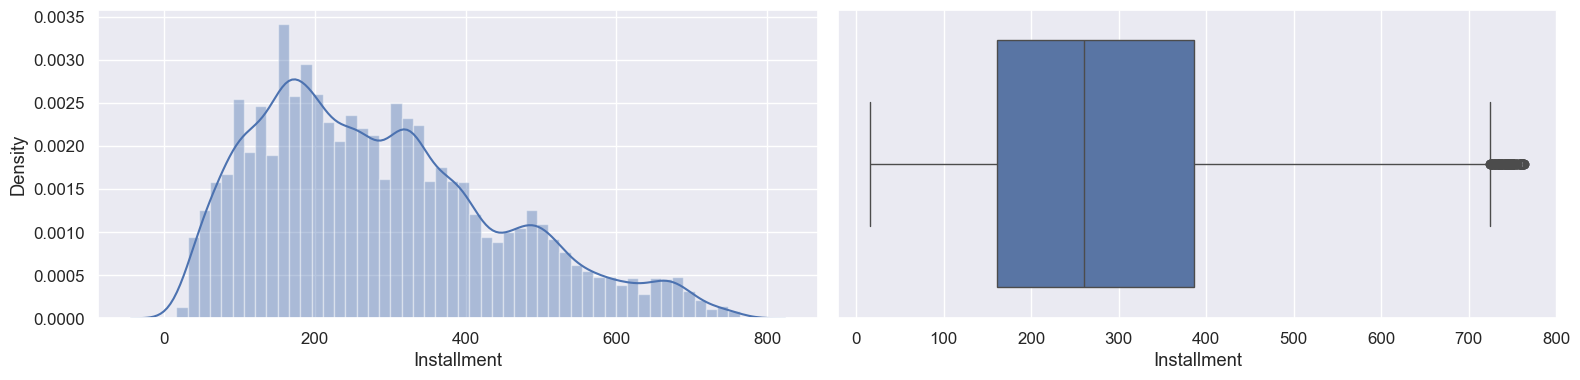

count    33191.000000
mean       286.456292
std        161.010324
min         16.080000
25%        161.130000
50%        260.480000
75%        386.390000
max        763.830000
Name: installment, dtype: float64

In [906]:
plot_digram(loan_df, 'installment')
loan_df['installment'].describe()

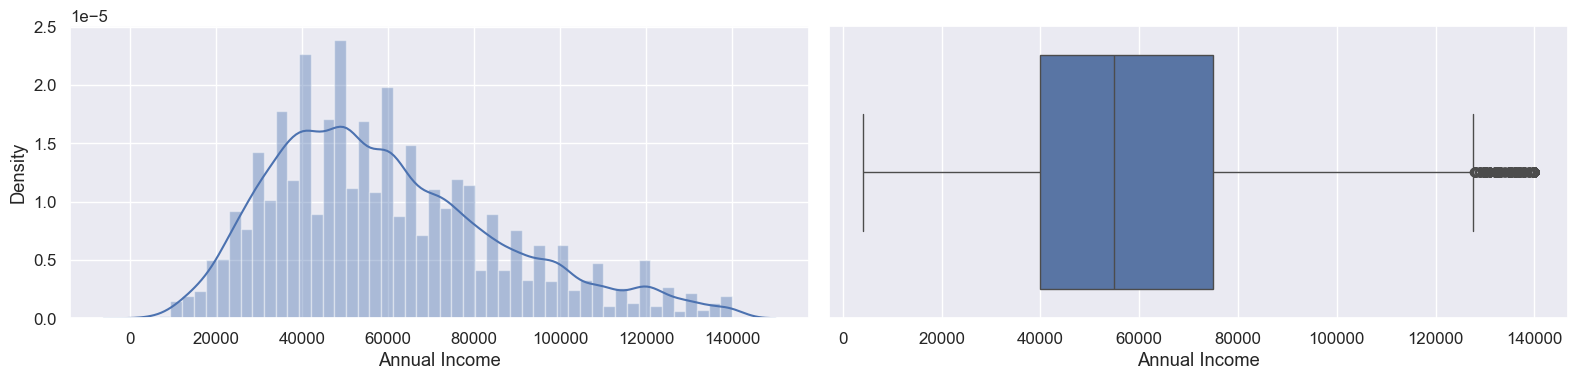

count     33191.000000
mean      59883.284700
std       26916.857415
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [907]:
plot_digram(loan_df, 'annual_inc')
loan_df['annual_inc'].describe()

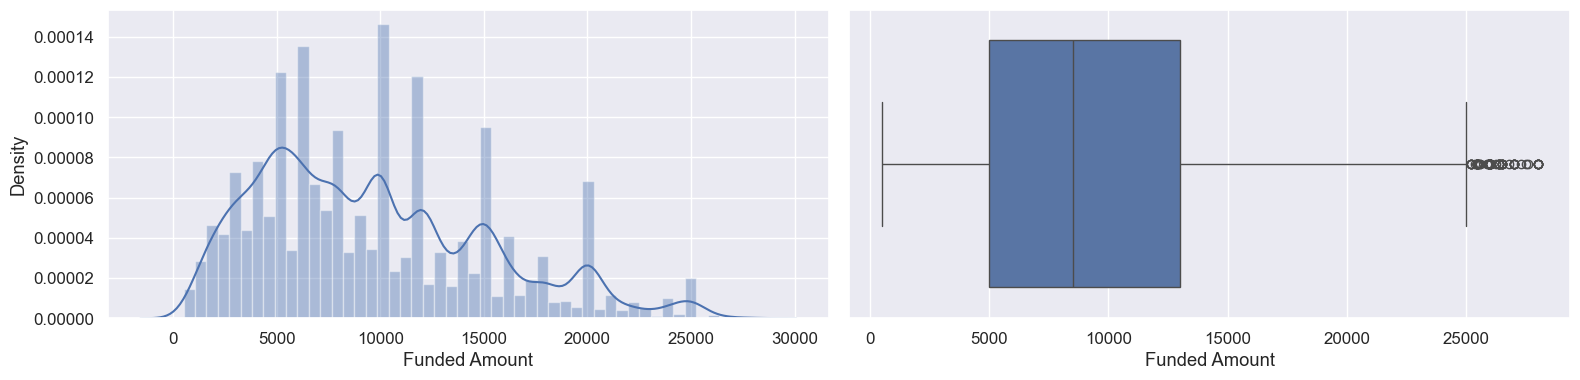

count    33191.000000
mean      9593.825887
std       5565.574327
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [908]:
plot_digram(loan_df, 'funded_amnt')
loan_df['funded_amnt'].describe()

### Unordered Categorical Variable Analysis

<Axes: xlabel='loan_status', ylabel='count'>

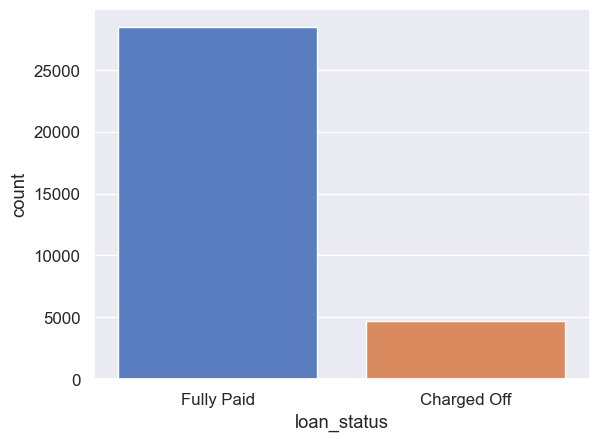

In [910]:
sea.countplot(x='loan_status', data=loan_df, palette='muted')

In [911]:
# Majority of loan applicants are either living on Rent or on Mortgage

<Axes: xlabel='purpose'>

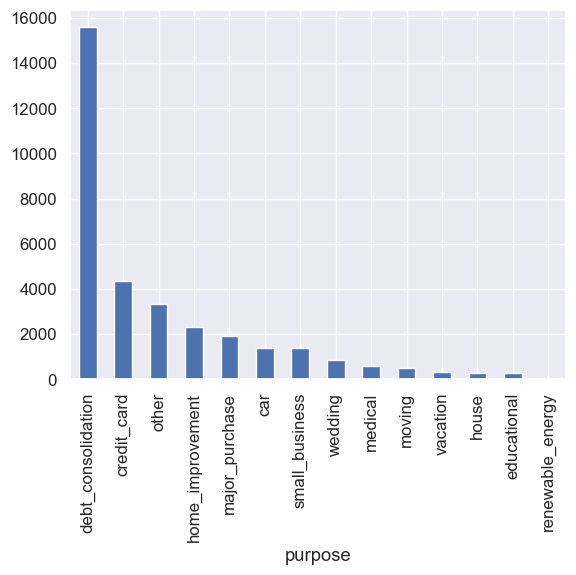

In [912]:
loan_df['purpose'].value_counts().plot.bar()

In [913]:
# Most of the loan applicants are for debt_consolidations.

In [914]:
loan_df["loan_status"].value_counts()

loan_status
Fully Paid     28477
Charged Off     4714
Name: count, dtype: int64

<Axes: ylabel='count'>

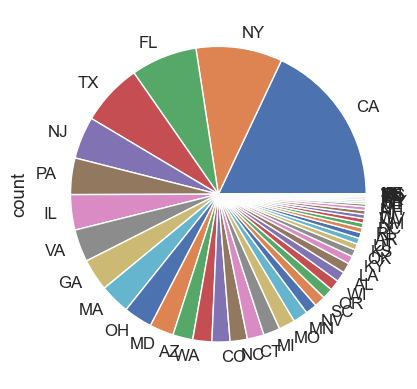

In [915]:
# State
loan_df['addr_state'].value_counts().plot(kind="pie")

In [916]:
# Most of the Loan applicants are from CA(State).

#### 5.3 Ordered Categorical Variable Analysis

<Axes: ylabel='count'>

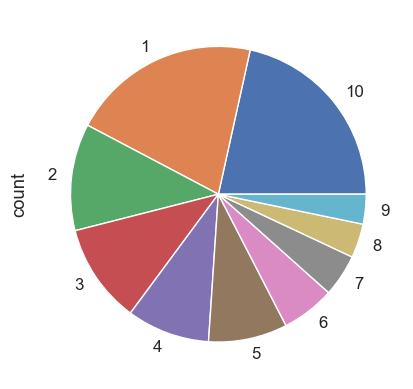

In [918]:
loan_df['emp_length'].value_counts().plot(kind="pie")

In [919]:
# Most of the applications are having 10+ yrs of Exp.

<Axes: xlabel='grade'>

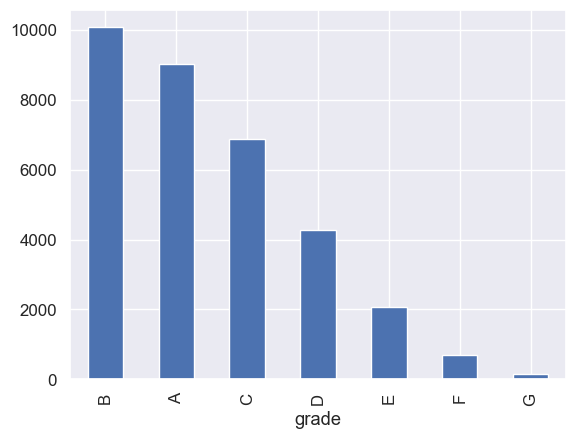

In [920]:
loan_df['grade'].value_counts(ascending=False).plot.bar()


In [921]:
# Majority of people are in grade B and A

## Bivariate Analysis

In [923]:
##  CHARGE OFF PROPORTION
# Counts of "Fully Paid" and "Charged Off" in 'loan_status' alone can be misleading.
# For instance, a state like California might show a higher count of "Charged Off" loans compared to other states.
# However, this higher count doesn't necessarily indicate a higher default risk in California.
# To better understand default risk, it's important to consider proportions or rates relative to the total number of loans
# in each category, rather than just the absolute counts.


In [924]:
#Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = loan_df.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1570,7326,8896,0.176484
2,50k to 60k,788,4435,5223,0.150871
1,40k - 50k,807,4593,5400,0.149444
3,60k to 70k,486,3261,3747,0.129704
4,70k to 80k,385,2749,3134,0.122846
5,80k - above,678,6113,6791,0.099838


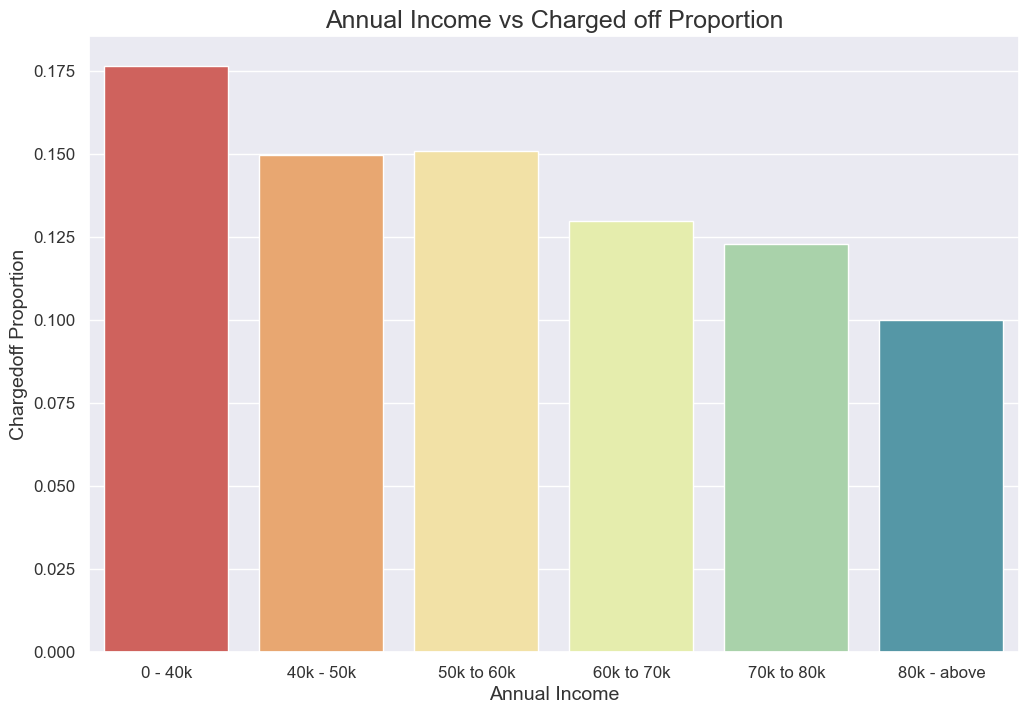

In [925]:
fig, ax1 = plot.subplots(figsize=(12, 8), facecolor='white')

ax1.set_title('Annual Income vs Charged off Proportion', fontsize=18, color='#333333')
ax1 = sea.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan, palette='Spectral')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='#333333')
ax1.set_xlabel('Annual Income', fontsize=14, color='#333333')

ax1.tick_params(colors='#333333')


plot.show()

#Income ranges above $80,000 have a lower likelihood of being charged off.
#Income ranges between $0-$20,000 have a higher likelihood of being charged off.
#As annual income increases, the proportion of charged-off loans decreases.

In [926]:
#Bivariate Analysis on Intrest rate  against Chargedoff_Proportion -

interest_vs_loan = loan_df.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1670,4751,6421,0.260084
0,High,985,4851,5836,0.168780
2,Moderate,961,5638,6599,0.145628
1,Low,579,4983,5562,0.104099
4,Very Low,519,8254,8773,0.059159


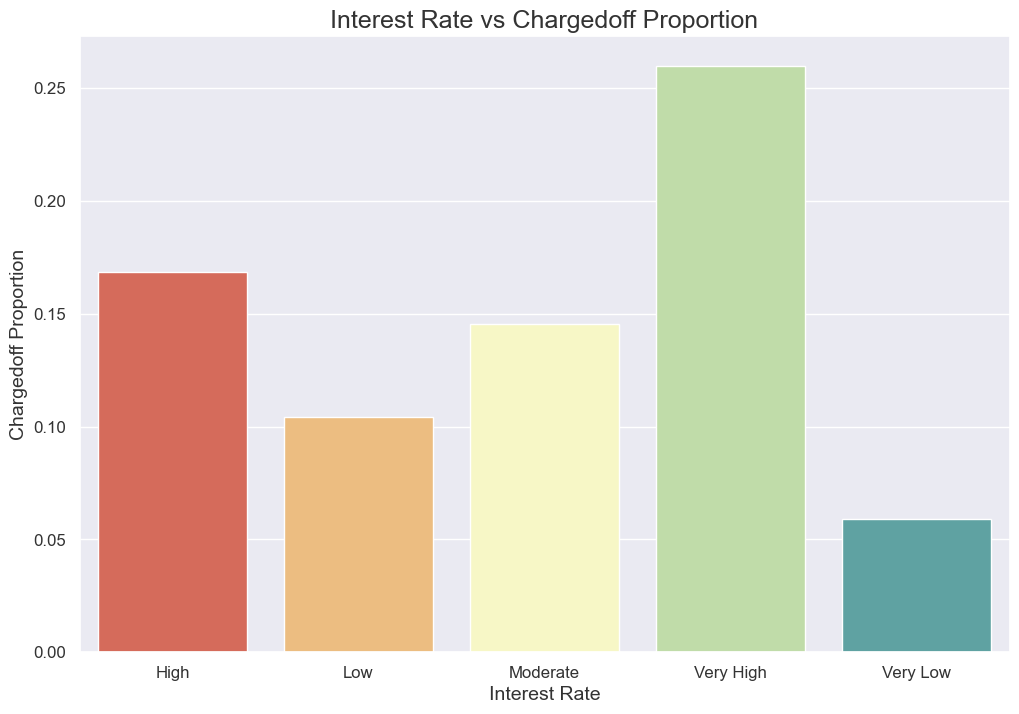

In [927]:
## plot the diagram.
fig, ax1 = plot.subplots(figsize=(12, 8), facecolor='white')
ax1.set_title('Interest Rate vs Chargedoff Proportion', fontsize=18, color='#333333')
ax1 = sea.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan, palette='Spectral')
ax1.set_xlabel('Interest Rate', fontsize=14, color='#333333')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='#333333')
ax1.tick_params(colors='#333333')

plot.show()


In [928]:
# Interest rates below 10% show a minimal likelihood of being charged off, with rates starting as low as 5%.
# Interest rates above 16% have a higher likelihood of being charged off compared to other interest rate categories.
# The proportion of charged-off loans increases as interest rates rise.

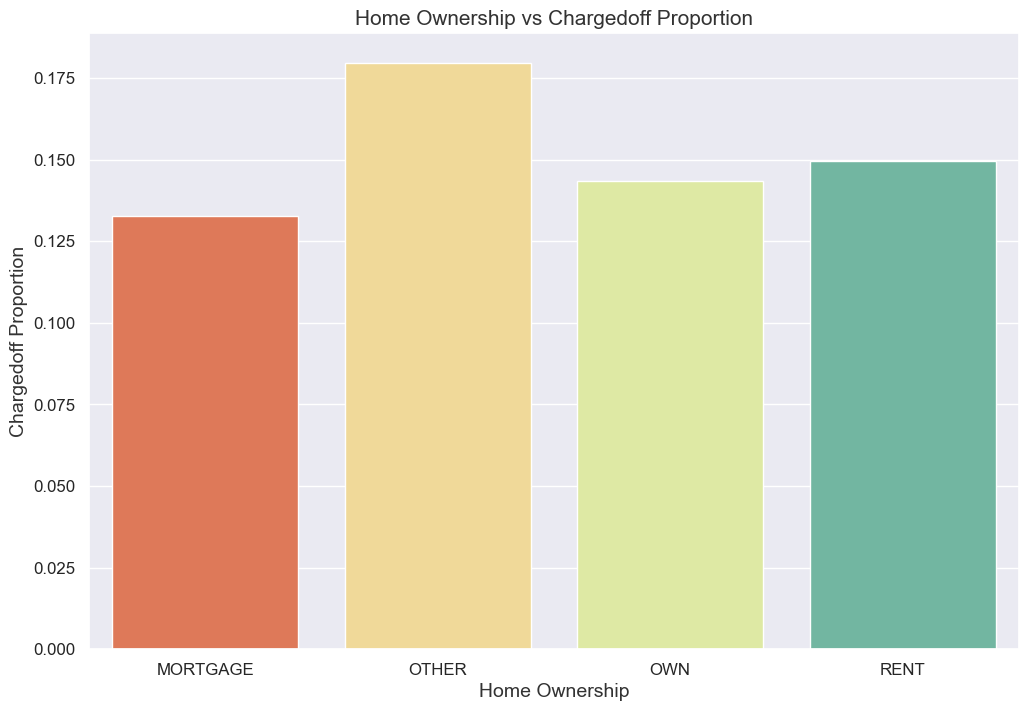

In [929]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -

home_ownership_vs_loan = loan_df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=15,color='#333333')
ax1=sea.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan, palette='Spectral')
ax1.set_xlabel('Home Ownership',fontsize=14,color='#333333')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='#333333')
plot.show()

In [930]:
# Those who are not owning the home is having high chances of loan defaults.

In [931]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -

purpose_vs_loan = loan_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,366,1003,1369,0.267348
10,renewable_energy,16,67,83,0.192771
5,house,49,249,298,0.164430
3,educational,46,235,281,0.163701
9,other,531,2823,3354,0.158318
7,medical,95,510,605,0.157025
8,moving,79,433,512,0.154297
2,debt_consolidation,2329,13253,15582,0.149467
12,vacation,49,281,330,0.148485
4,home_improvement,277,2026,2303,0.120278


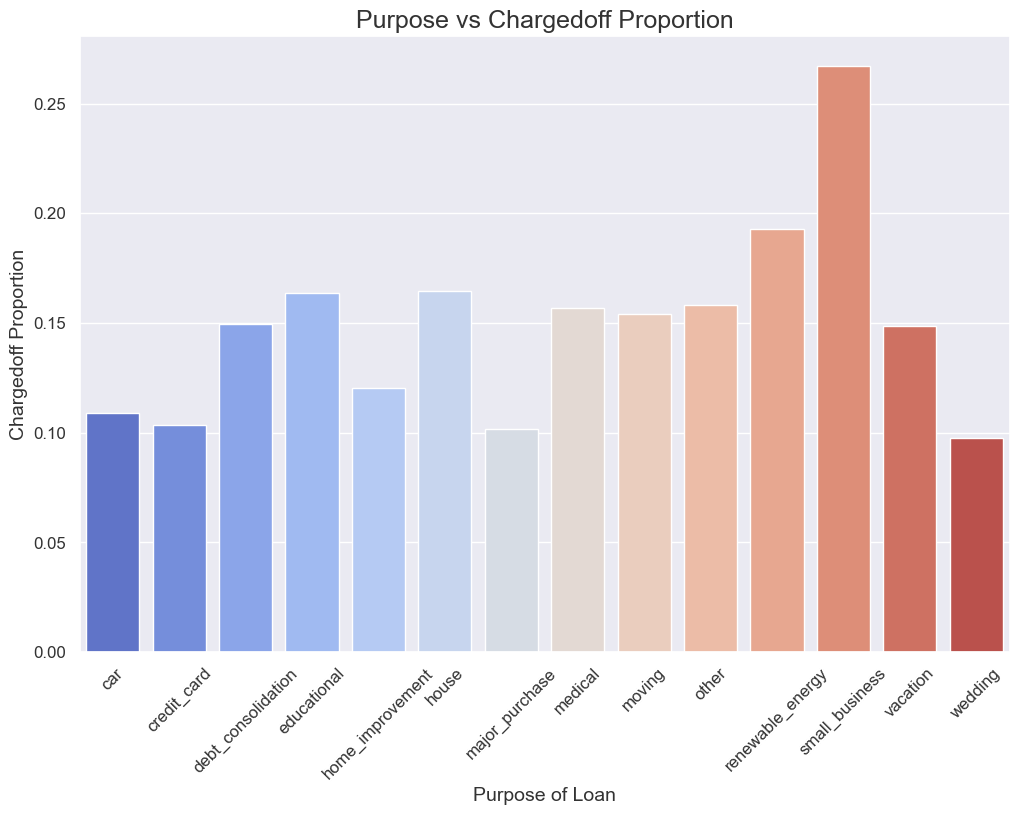

In [932]:
fig, ax1 = plot.subplots(figsize=(12, 8), facecolor='white')
ax1.set_title('Purpose vs Chargedoff Proportion', fontsize=18, color='#333333')
ax1 = sea.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan, palette='coolwarm')
ax1.set_xlabel('Purpose of Loan', fontsize=14, color='#333333')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='#333333')
plot.xticks(rotation=45, color='#333333')
ax1.tick_params(colors='#333333')

plot.show()

In [933]:
# Applicants with a home loan tend to have a lower likelihood of loan defaults.
# Applicants with loans for small businesses are more likely to default on their loans.

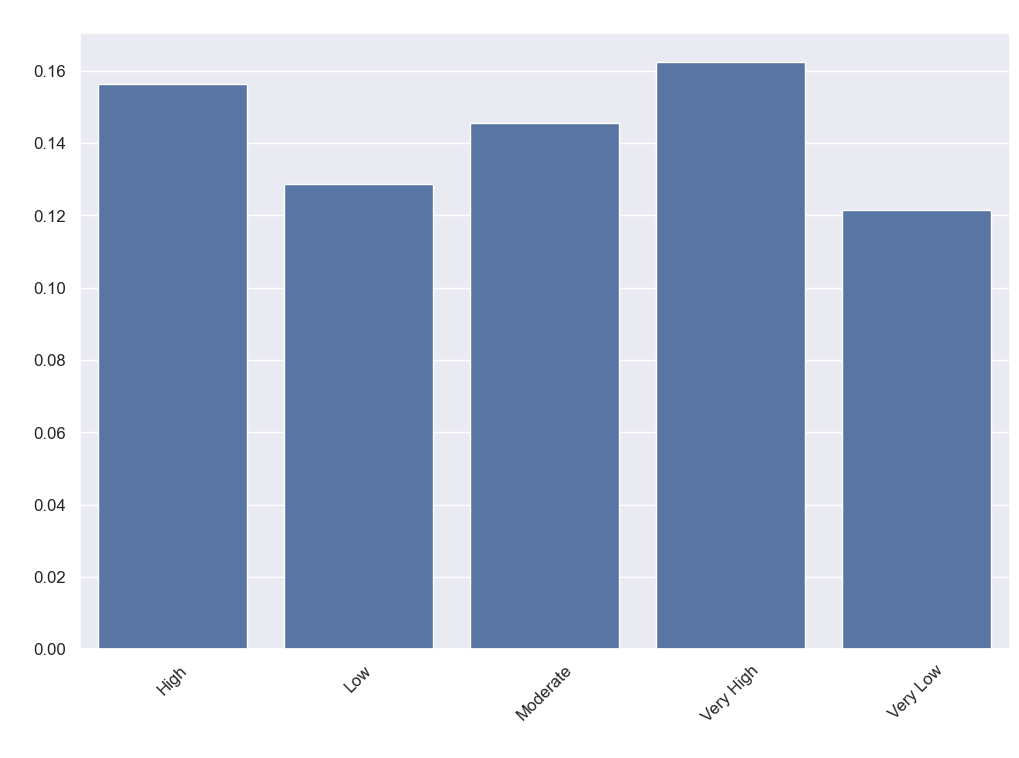

In [934]:
#Bivariate Analysis on DTI against Chargedoff_Proportion -

dti_vs_loan = loan_df.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='dti_b', y='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_xlabel('Debt To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [935]:
# A high DTI (Debt-to-Income) ratio is associated with a greater risk of loan defaults.
# A lower DTI ratio corresponds to a reduced likelihood of loan defaults.

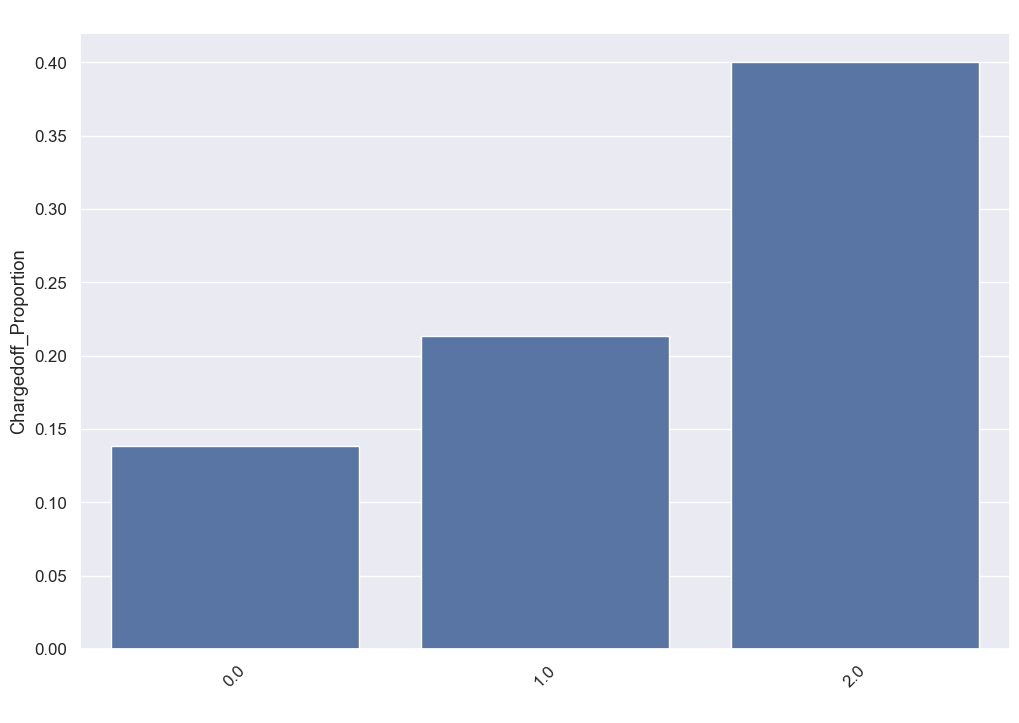

In [936]:
# #Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportion -
pub_rec_bankruptcies_vs_loan = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan)
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=14,color='w')
plot.xticks(rotation=45)
plot.show()

In [937]:
#A bankruptcy record of 2 significantly increases the likelihood of loan defaults.
#A bankruptcy record of 0 has minimal impact on loan defaults.
#Fewer bankruptcies correlate with a lower risk of loan default.



In [938]:
    # Year 2007 is highest loan defaults, 2009 is the 


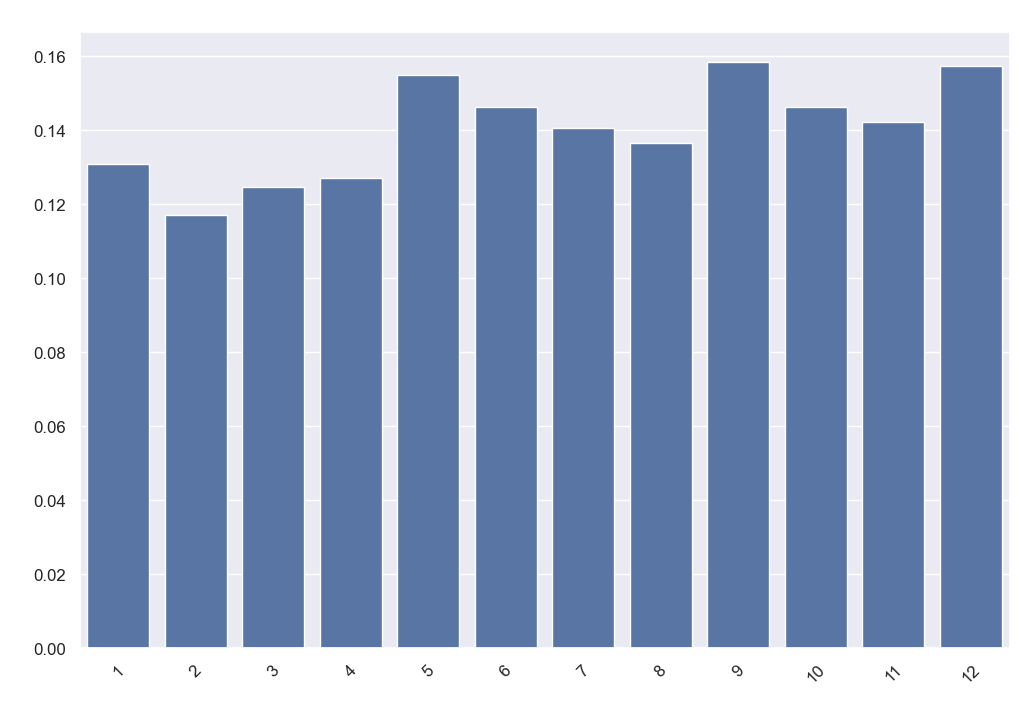

In [939]:
# #Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion -

issue_month_vs_loan = loan_df.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan)
ax1.set_xlabel('Issue Month ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [940]:
#Loans issued in May, September, and December show a high number of defaults.
#Loans issued in February also exhibit a significant number of defaults.
#Most loan defaults occur among applicants whose loans were approved between September and December.

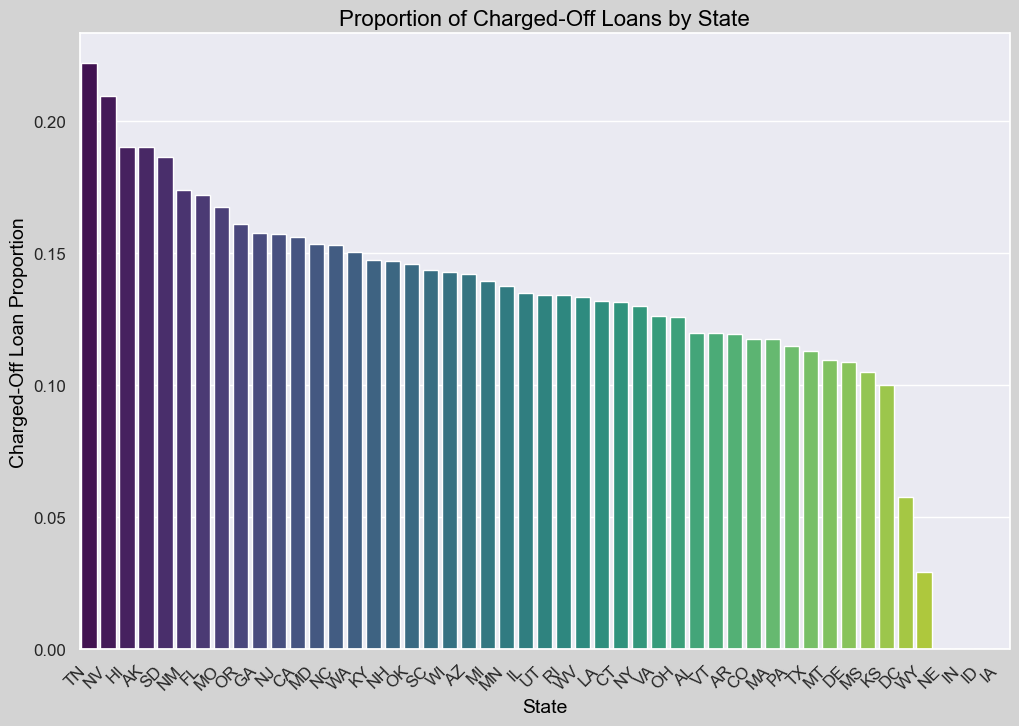

In [941]:
# Address State and Charged-off Proportion

# Group by 'addr_state' and 'loan_status', then count occurrences
state_loan_summary = loan_df.groupby(['addr_state', 'loan_status']).size().unstack(fill_value=0).reset_index()
state_loan_summary['Total Loans'] = state_loan_summary['Charged Off'] + state_loan_summary['Fully Paid']
state_loan_summary['Chargedoff Ratio'] = state_loan_summary['Charged Off'] / state_loan_summary['Total Loans']
state_loan_summary_sorted = state_loan_summary.sort_values('Chargedoff Ratio', ascending=False)

# Plotting
fig, ax = plot.subplots(figsize=(12, 8), facecolor='lightgrey')
ax.set_title('Proportion of Charged-Off Loans by State', fontsize=16, color='black')
ax = sea.barplot(x='addr_state', y='Chargedoff Ratio', data=state_loan_summary_sorted, palette='viridis')
ax.set_xlabel('State', fontsize=14, color='black')
ax.set_ylabel('Charged-Off Loan Proportion', fontsize=14, color='black')
plot.xticks(rotation=45, ha='right')

plot.show()


In [942]:
#Tennessee (TN) has the highest number of loan defaults.
#California (CA) has a lower number of loan defaults.


## Correlation Analysis

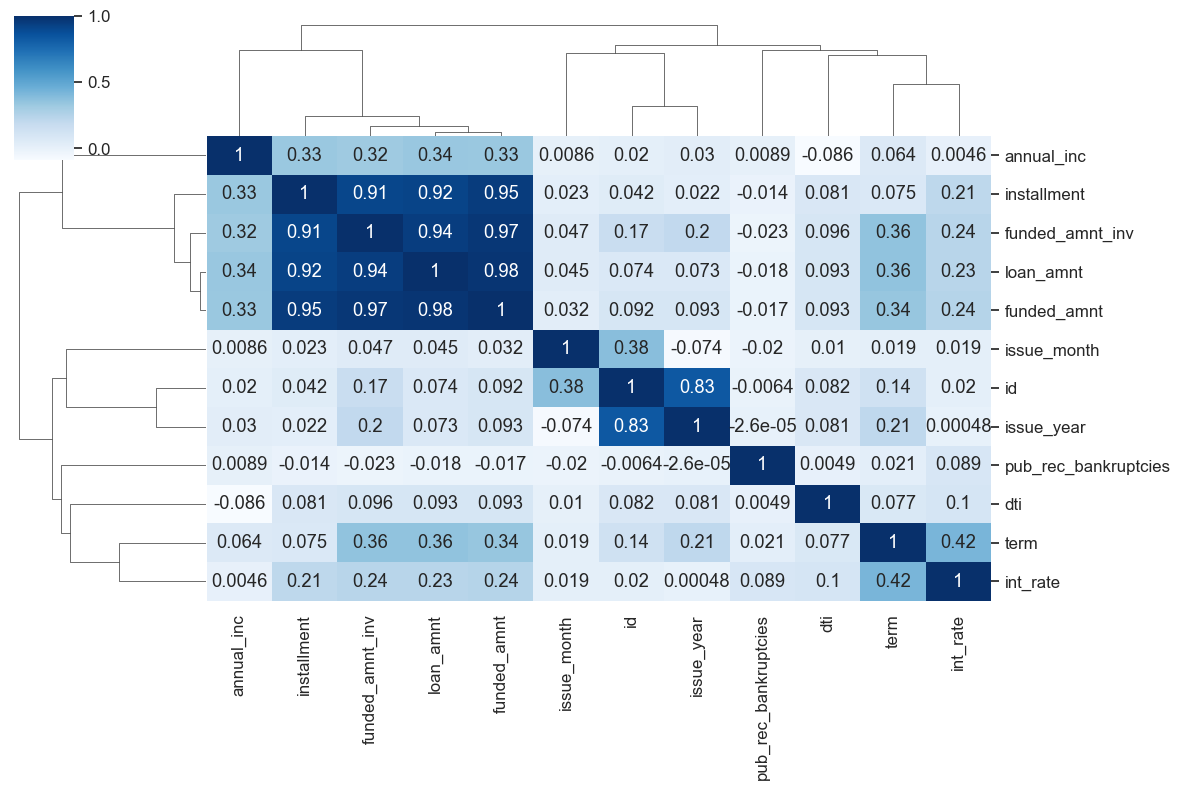

In [944]:
import matplotlib.pyplot as plot
import seaborn as sea
import pandas as pd

corr_loan = loan_df.select_dtypes(include=[np.number])  
corr = corr_loan.corr()

sea.set(font_scale=1.1)

sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")

plot.show()


In [945]:
drop_columns = ['installment', 'id', 'issue_year', 'issue_month']
corr_loan = corr_loan.drop(columns=drop_columns)

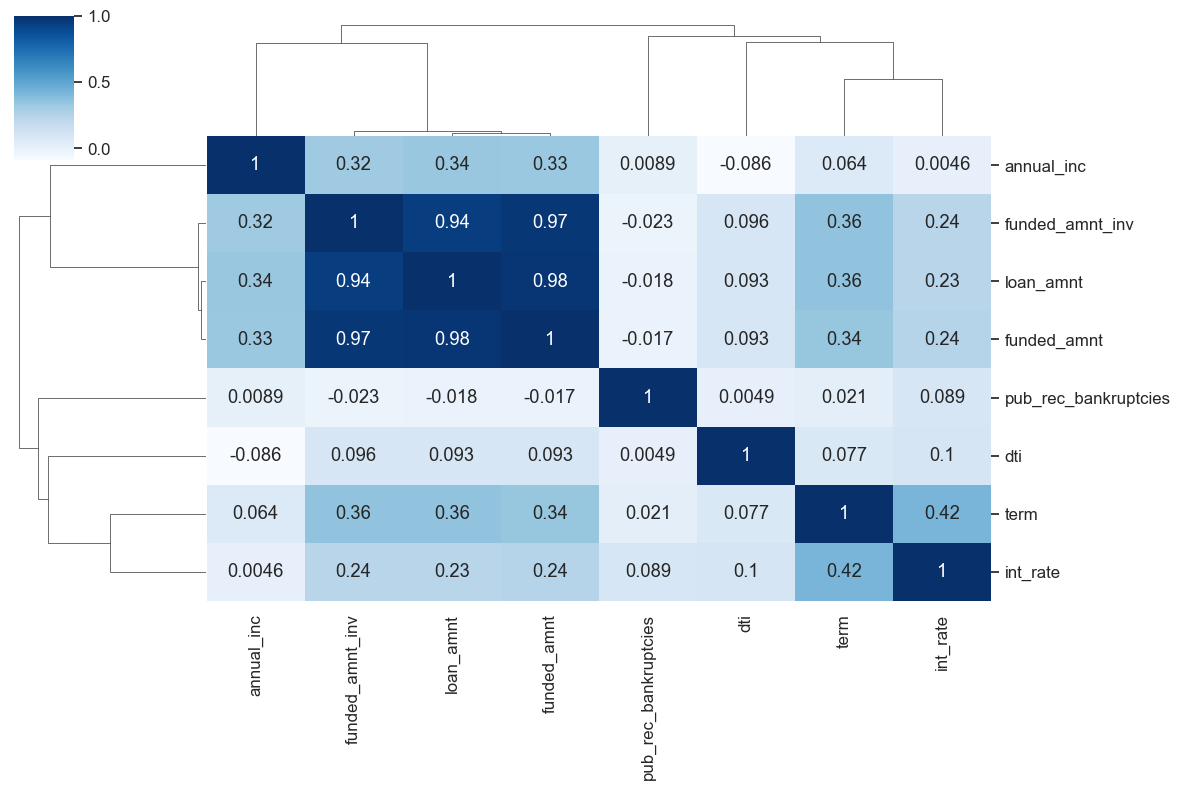

In [946]:
corr = corr_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

In [947]:

# Loan amount is negatively correlated with public record bankruptcies.
# Annual income shows a negative correlation with debt-to-income ratio (DTI).
# Loan term has a strong correlation with loan amount.
# Loan term is also strongly correlated with interest rate.
# Annual income is strongly correlated with loan amount.